In [94]:
import matplotlib.pyplot as plt
import pandas 
import numpy
import re

In [131]:
backtest_result = 'backtest_result/results_summary_btc_15m.csv'
df = pandas.read_csv(backtest_result)

    coinpair  length_in_days      balance  config_length  config_multiplier  \
560      btc     3598.010417  1001.835193             20               20.0   

     no_of_orders  number_of_profit_order  average_profit  \
560           210                     102       15.783992   

     number_of_loss_order  average_loss  avarage_pnl_per_month  
560                   108     -5.630852               8.353243  


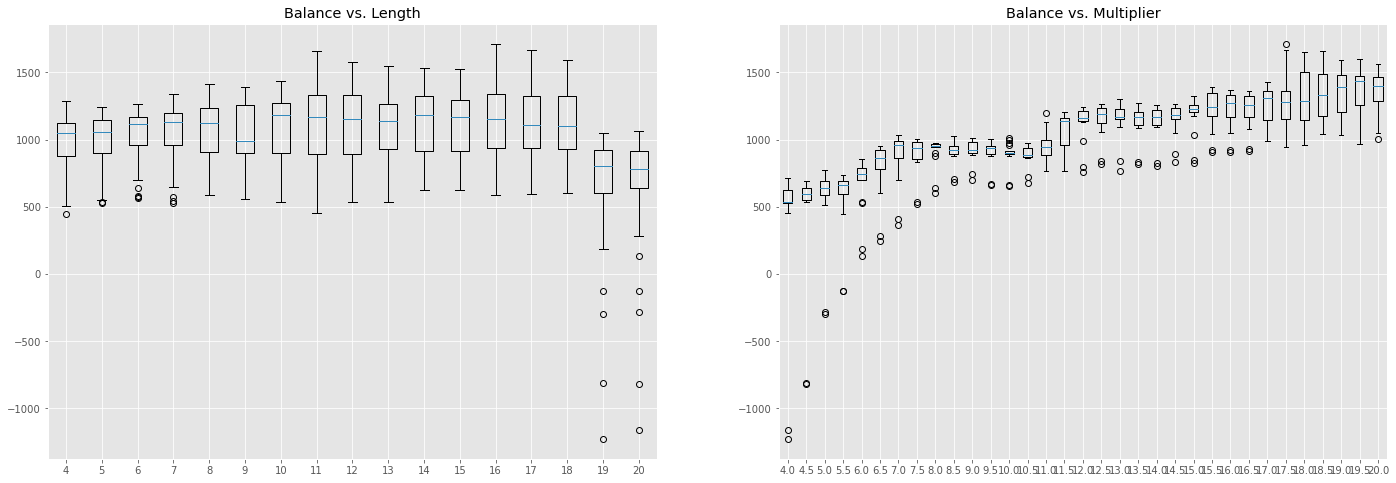

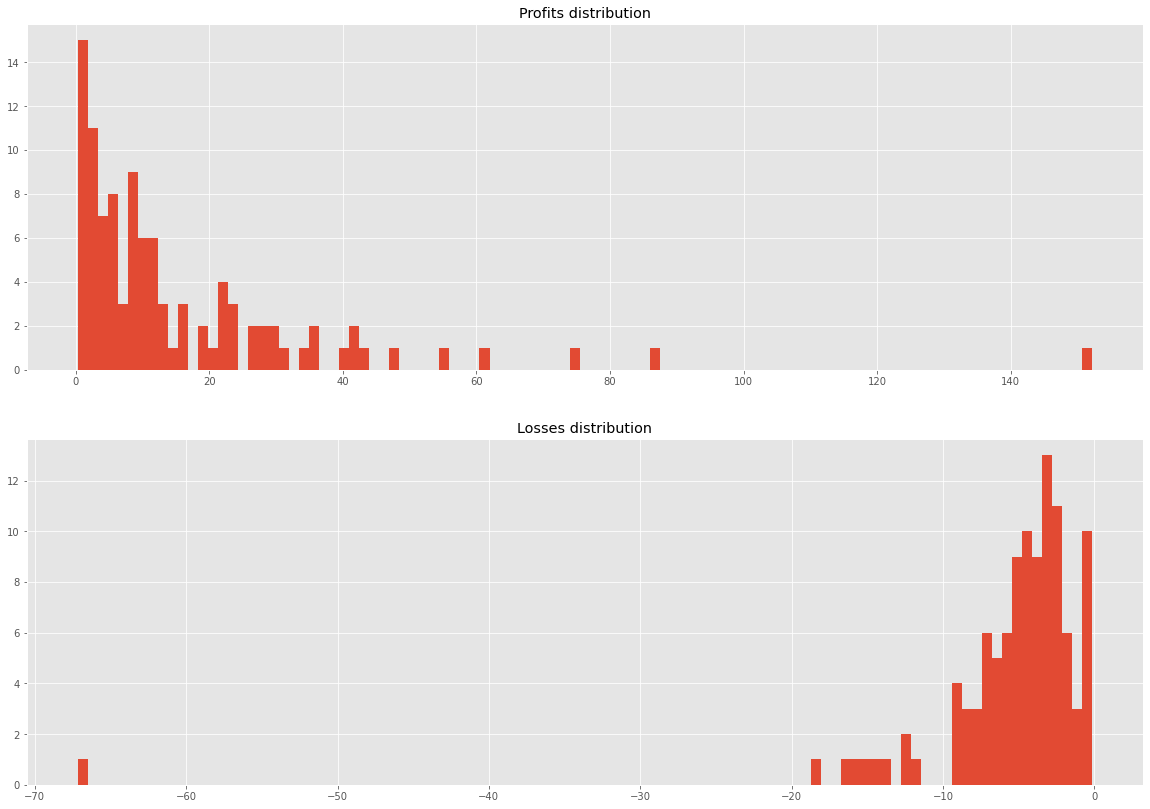

In [140]:
def plot1(df):
  df['balance_std'] = (df['balance'] - df['balance'].mean()) / df['balance'].std()

  # Plot balances distribution against Length and Multiplier 
  balance_for_lengths = []
  balance_for_multipliers = []
  max_mean_balance_for_lengths = 0
  max_mean_balance_for_multipliers = 0
  good_length = 0
  good_multiplier = 0
  
  for length in range(4,21):
    balance_for_each_length = list(df[df['config_length'].values == length]['balance'])
    mean = numpy.mean(balance_for_each_length)
    balance_for_lengths.append(balance_for_each_length)
    if (mean > max_mean_balance_for_lengths):
      good_length = length

  fig = plt.figure(figsize=[24, 8])
  ax = fig.add_subplot(1, 2, 1)
  ax.boxplot(balance_for_lengths)
  ax.set_xticklabels(range(4,21))
  ax.set_title('Balance vs. Length')

  for multiplier in numpy.arange(4,20.5,0.5):
    balance_for_each_multiplier = list(df[df['config_multiplier'].values == multiplier]['balance'])
    mean = numpy.mean(balance_for_each_multiplier)
    balance_for_multipliers.append(balance_for_each_multiplier)
    if (mean > max_mean_balance_for_multipliers):
      good_multiplier = multiplier

  ax = fig.add_subplot(1, 2, 2)
  ax.boxplot(balance_for_multipliers)
  ax.set_xticklabels(numpy.arange(4,20.5,0.5))
  ax.set_title('Balance vs. Multiplier')


  # Plot pnl amounts histogram
  df2 = df.query(f"config_length=={good_length} & config_multiplier=={good_multiplier}").copy()
  print(df2.iloc[:,:-3])
  profit_amounts = re.sub("\[|\]|\"|\s", "", df2.iloc[0].profit_amounts).split(',')
  profit_amounts = [float(x) for x in profit_amounts]
  profit_amounts

  fig = plt.figure(figsize=[20, 14])
  ax = fig.add_subplot(2, 1, 1)
  ax.hist(profit_amounts, 101)
  # ax.set_xticks(range(0,600,20))
  ax.set_title('Profits distribution')

  profit_amounts = re.sub("\[|\]|\"|\s", "", df2.iloc[0].loss_amounts).split(',')
  profit_amounts = [float(x) for x in profit_amounts]
  profit_amounts

  ax = fig.add_subplot(2, 1, 2)
  ax.hist(profit_amounts, 101)
  # ax.set_xticks(range(0,600,20))
  ax.set_title('Losses distribution')


plot1(df)

# Get the best mean value from the 2 above tables
# df.query('config_length==14 & config_multiplier==19.5')['balance']